In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sympy import *
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
init_printing()

x, y, z, t = symbols('x y z t')

Enter x coordinate and y coordinate within a circle of diameter 10 : -5 5


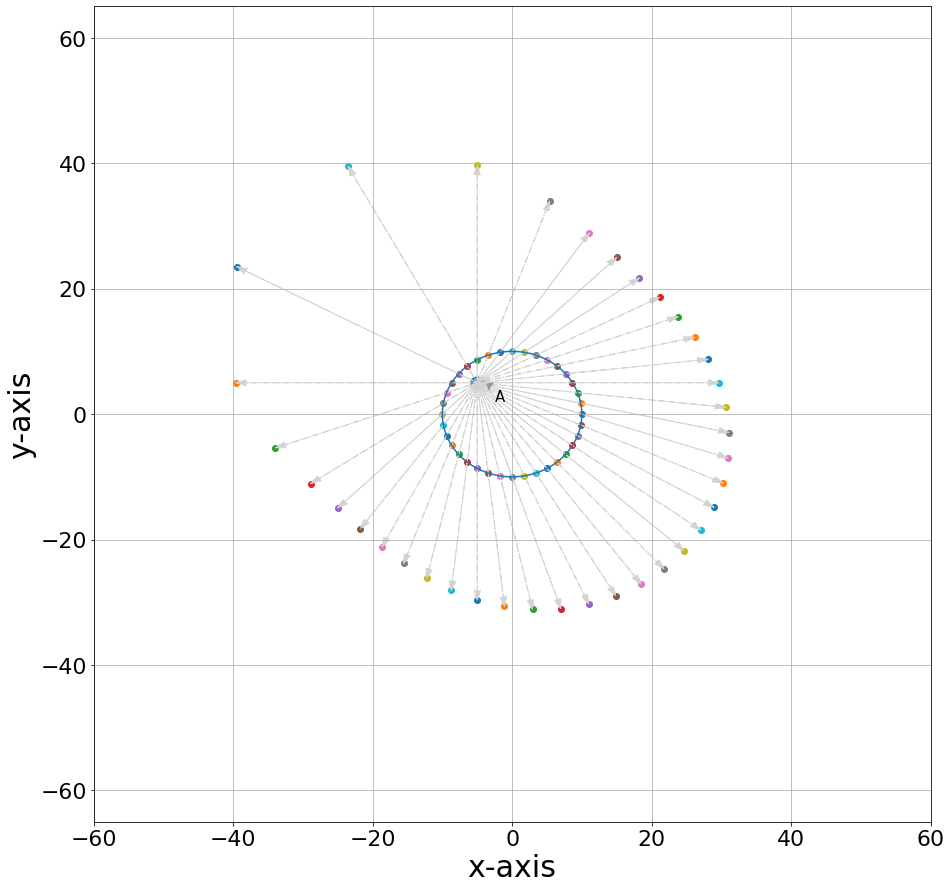

In [4]:
a, b, r = (0, 0, 10)
x1 = []
y1 = []
x_ax, y_ax = input('Enter x coordinate and y coordinate within a circle of diameter 10 : ').split()
o = (int(x_ax), int(y_ax))
j = o[0] + 5
q = o[1] + 3
xy = []
dt1 = 0              #the distance on the first inner contact, outgoing
dt2 = 0             #the distance of parallel path on the other side of circle, between the two intersections.

for theta in range(0, 360):
    x1.append(a + r * math.cos(math.radians(theta)))
    y1.append(b + r * math.sin(math.radians(theta)))
    
fig, ax = plt.subplots(figsize = (15, 15))
#ax[0, 0].scatter(o[0], o[1])

el = Ellipse(o, 2, 2)
ax.add_patch(el)
'''putting passing points on the circle'''
for i, theta in enumerate(range(0, 360, 10)):
    xy.append((a + r * math.cos(math.radians(theta)), (b + r * math.sin(math.radians(theta)))))
    ax.scatter(xy[i][0], xy[i][1])
    #ax.annotate(txt, (xy[i][0], xy[i][1]), fontsize=20)
    #if i == 24:
    #    for j, theta in enumerate(range(122, 148, 6)):
    #        xy.append((a + r * math.cos(math.radians(theta)), (b + r * math.sin(math.radians(theta)))))
    #        ax.scatter(xy[j+24][0], xy[j+24][1])
    #ax[i, j].add_patch(el)
'''putting arrow and text on o'''    
ax.annotate('A', size=15,
            xy=o, xycoords='data',
            xytext=(-1, 4), textcoords='data',
            arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
            fc="0.6", ec="none",
            patchB=el,
            connectionstyle="arc3,rad=0.3"),
            horizontalalignment='right', verticalalignment='top')
'''deco'''
ax.plot(x1, y1)
ax.grid()
plt.setp(ax.get_xticklabels(), fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=22)
ax.set_xlabel('x-axis', fontsize=30)
ax.set_ylabel('y-axis', fontsize=30)
ax.set_xlim([-60, 60])
ax.set_ylim([-65, 65])
title = ''
ax.set_title(title, size=30)


#일차 방정식 그래프 그리기
for i, p in enumerate(xy):
    txt = str(i)                                  
    if round(p[0]-o[0], 8) == 0:
        m1 = 'na'                               #gradient       
        if round(p[0], 8) == 0:                           #when both are 0
            dt1 = 10
        else:
            dt = solve([Eq(x**2+y**2, 100), Eq(x, o[0])], [x, y])
            dt1 = abs(N(dt[0][1])-N(dt[1][1]))
        
    else:
        '''1st line, to get the distance between first two intersections where the circle and the first line meet''' 
        #두 점을 지나는 직선의 기울기를 찾고 그 직선과 원의 교점 찾기, (-value, +value), (-value, +value) 순서.
        m1 = (p[1]-o[1])/(p[0]-o[0])                 
        n1 = o[1]-(m1*o[0])                             #y절편
        ct1 = solve([Eq(x**2+y**2, 100), Eq(m1*x-y+n1, 0)], [x, y])          #연립방정식으로 직선과 원의 두 접점 구하기
        (ip100, ip101), (ip110, ip111) = (round(N(ct1[0][0]), 4), round(N(ct1[0][1]), 4)), (round(N(ct1[1][0]), 4), round(N(ct1[1][1]), 4)) #intersection point
        dt1 = math.sqrt((ip111-ip101)**2+(ip110-ip100)**2)
        #print(ip100, ip101, ip110, ip111)                       #to check the data

    '''2nd line crossing the center of the circle from point p'''
    if p[0] == 0:                                              #to prevent for m goes to infinity
        (ip200, ip201), (ip210, ip211) = (0, -10), (0, 10)
    else:
        m2 = (p[1] - 0)/(p[0] - 0)                      #두번째 직선의 기울기, p점과 원점을 포함하는 직선
        n2 = p[1] - (m2*p[0])
        ct2 = solve([Eq(x**2+y**2, 100), Eq(m2*x-y+n2, 0)], [x, y])          #연립방정식으로 직선과 원의 두 접점 구하기
        (ip200, ip201), (ip210, ip211) = (round(N(ct2[0][0]), 4), round(N(ct2[0][1]), 4)), (round(N(ct2[1][0]), 4), round(N(ct2[1][1]), 4)) #intersection point
        #print(ip200, ip201, ip210, ip211)                       #to inspect the data
        #print('')       
    '''3rd, last line, same gradient with the 1st line'''    
    if ((ip110, ip111) == (ip210, ip211)) & (m1 != 'na'):
        n3 = ip201 - (m1*ip200)
        ct3 = solve([Eq(x**2+y**2, 100), Eq(m1*x-y+n3, 0)], [x, y])          #연립방정식으로 직선과 원의 두 접점 구하기
        (ip300, ip301), (ip310, ip311) = (round(N(ct3[0][0]), 4), round(N(ct3[0][1]), 4)), (round(N(ct3[1][0]), 4), round(N(ct3[1][1]), 4)) #intersection point
        dt2 = math.sqrt((ip311-ip301)**2+(ip310-ip300)**2)
    elif m1 != 'na':
        n3 = ip211 - (m1*ip210)
        ct3 = solve([Eq(x**2+y**2, 100), Eq(m1*x-y+n3, 0)], [x, y])          #연립방정식으로 직선과 원의 두 접점 구하기
        (ip300, ip301), (ip310, ip311) = (round(N(ct3[0][0]), 4), round(N(ct3[0][1]), 4)), (round(N(ct3[1][0]), 4), round(N(ct3[1][1]), 4)) #intersection point
        dt2 = math.sqrt((ip311-ip301)**2+(ip310-ip300)**2)
    else:
        if o[0] == 0:
            dt2 = 10
        else:
            dt2 = dt1
    T_dt = dt1 + dt2   #Total distance, to get the closest round trip distance in that angle
    
    if m1 != 'na':
        if ((ip100, ip101) == (ip200, ip201)) & ((ip110, ip111) == (ip210, ip211)):     #when o is on x-axis.

            o1 = solve([Eq(x**2-2*o[0]*x+y**2-2*o[1]*y+o[0]**2+o[1]**2-20**2, 0), Eq(m1*x-y+n1, 0)], [x, y])
     
            '''관측자의 위치가 지름선 위에 있는 경우 o1의 좌표 구하기'''
        
            if p[0] < 0:
                other_o = (o1[0][0], o1[0][1])
                #print(other_o)
            else:
                other_o = (o1[1][0], o1[1][1])
                #print(other_o)
            ax.scatter(other_o[0], other_o[1])
        elif ((ip100, ip101) == (ip200, ip201)):
            o1 = solve([Eq(x**2-2*o[0]*x+y**2-2*o[1]*y+o[0]**2+o[1]**2-T_dt**2, 0), Eq(m1*x-y+n1, 0)], [x, y])
            other_o = (N(o1[0][0]), N(o1[0][1]))
        else:
            o1 = solve([Eq(x**2-2*o[0]*x+y**2-2*o[1]*y+o[0]**2+o[1]**2-T_dt**2, 0), Eq(m1*x-y+n1, 0)], [x, y])
            if p[0] >= 0 and p[0] < o[0]:
                other_o = (N(o1[0][0]), N(o1[0][1]))
            else:
                other_o = (N(o1[1][0]), N(o1[1][1]))

    else:
        if o[0] == 0:
            o1 = [(0, o[1]- T_dt), (0, o[1]+ T_dt)]   #when o is on y-axis
            if p[1] < 0:
                other_o = (o1[0][0], o1[0][1])
            else:
                other_o = (o1[1][0], o1[1][1])
        else:                                               #when o and p have same x cord but p is not on y-axis
            o1 = [(o[0], o[1]- T_dt), (o[0], o[1]+ T_dt)]
            if p[1] < 0:
                other_o = (o1[0][0], o1[0][1])

            else:
                other_o = (o1[1][0], o1[1][1])
  
    ax.scatter(other_o[0], other_o[1])
    
    # draw arrows

    other_o = np.array(other_o, dtype=float)      #change data type in order to avoid 'AttributeError' due to np.hypot
    ax.arrow(o[0], o[1], other_o[0]-o[0], other_o[1]-o[1], width=0.005, head_width=1, length_includes_head=True, color='lightgrey', ls='-.')
            
    #ax.annotate(str(i), (other_o[0], other_o[1]), fontsize=15)

#fig.savefig('fig_1_12.png', dpi=300)
#fig.savefig('fig_1_12.jpg', pil_kwargs={'quality':50})

In [3]:
#Under this cell is for a test.

In [89]:
fig.savefig('fig_1_12.png', dpi=300)
fig.savefig('fig_1_12.jpg', pil_kwargs={'quality':50})